# Car Price Prediction using Linear Regression

<img src = "https://github.com/babukanagaraj/DataScience/blob/master/MachineLearning/CarPrice/images/car.jpg?raw=true"> </br>

## 1. Problem Statement

Understand **used car price** data and suggest the factors that helps the clients in deciding the **price** of the used car.

## 2. Import Libraries

In [1]:
import numpy as np                                                 
import pandas as pd                                                
import matplotlib.pyplot as plt                                    
import seaborn as sns                                              
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

## 3. Import Dataset

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/babukanagaraj/DataScience/master/MachineLearning/CarPrice/data/CarDetails.csv")

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


- ```info``` function gives us the following insights into the event_data dataframe:
    - There are total of **4340** rows and **8** columns in the dataframe.
    - Columns are of **numeric and categorical** datatype.
    - **No null** values are present in the dataset.

In [5]:
data.describe(include=[np.number]).apply(lambda s: s.apply('{0:.5f}'.format))

,year,selling_price,km_driven
count,4340.00000,4340.00000,4340.00000
mean,2013.09078,504127.31175,66215.77742
std,4.21534,578548.73614,46644.10219
min,1992.00000,20000.00000,1.00000
25%,2011.00000,208749.75000,35000.00000
50%,2014.00000,350000.00000,60000.00000
75%,2016.00000,600000.00000,90000.00000
max,2020.00000,8900000.00000,806599.00000


- ```describe``` function gives us the following insights into the data dataframe.
*   Numerical columns:
    - The **year column** almost follows **normal distribution** since the **mean (2013)** is very close to **median (2014)** and also the data is slightly **Left-skewed** since the **mean < median**. 
    - The **selling_price column** almost follows **normal distribution** since the **mean (5.0)** is very close to **median (3.5)** and also the data is slightly **Right-skewed** since the **mean > median**. 
    - The **km_driven column** almost follows **normal distribution** since the **mean (66215.0)** is very close to **median (60000.0)** and also the data is  **Right-skewed** since the **mean > median**.  
    - The **km_driven column** contains **outliers** since the max is far away from the mean/median.

In [6]:
data.describe(exclude=[np.number])

,name,fuel,seller_type,transmission,owner
count,4340,4340,4340,4340,4340
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,69,2153,3244,3892,2832


- ```describe``` function gives us the following insights into the data dataframe.
*   Categorical columns:
    - The **name** column has 1491 unique values. **Maruti Swift Dzire VDI** tops the list with frequency of 69.
    - The **fuel** column has 2153 unique values. **Diesel** tops the list with frequency of 5.
    - The **seller_type** column has 3244 unique values. **Individual** tops the list with frequency of 3.
    - The **transmission** column has 3892 unique values. **Manual** tops the list with frequency of 2.
    - The **owner** column has 2832 unique values. **First Owner** tops the list with frequency of 5.

In [7]:
data.shape

(4340, 8)

## 4. Feature Engineering

### 4.1 Checking Duplicate values

In [8]:
data[data.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


- There are **763** duplicate rows in the dataset.

In [9]:
# Drop duplicate rows
data.drop_duplicates(inplace = True)
data.shape

(3577, 8)

In [10]:
# Recheck for duplicates
data[data.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner


In [11]:
# Reset the index since the index numbers are incorrect post removing duplicate data
data.reset_index(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3577 entries, 0 to 3576
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          3577 non-null   int64 
 1   name           3577 non-null   object
 2   year           3577 non-null   int64 
 3   selling_price  3577 non-null   int64 
 4   km_driven      3577 non-null   int64 
 5   fuel           3577 non-null   object
 6   seller_type    3577 non-null   object
 7   transmission   3577 non-null   object
 8   owner          3577 non-null   object
dtypes: int64(4), object(5)
memory usage: 251.6+ KB


In [12]:
data.drop('index', axis = 1, inplace = True)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### 4.2 Engineering new columns

In [13]:
# Create a new column 'brand' extracting data from the existing column 'name'
data['brand'] = [name.split()[0] for name in data['name']]
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [14]:
# Create a new column 'car_name' extracting data from the existing column 'name'
carname = data['name'].str.split()
data['car_name'] = [' '.join(name[1:]) for name in carname]
data.drop('name', axis =1, inplace = True)

carname = data['car_name'].str.split()
data['car_variant'] = [' '.join(name[1:]) for name in carname]
#data_1.drop('name', axis =1, inplace = True)

carname = data['car_name'].str.split()
data['car_name_1'] = [' '.join(name[0:1]) for name in carname]
#data_1.drop('name', axis =1, inplace = True)

data.drop('car_name', axis =1, inplace = True)
data.rename(columns = {'car_name_1':'car_name'},inplace=True)

data.drop('car_variant', axis =1, inplace = True)
data.reset_index(inplace=True)
data.drop('index', axis = 1, inplace = True)
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,car_name
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze


### 4.3 Correlation

In [15]:
# Checking correlation of data. If correlation > 0.8 then drop those columns
data_corr = data.corr(method='pearson').abs()
data_corr

,year,selling_price,km_driven
year,1.00000,0.424260,0.417490
selling_price,0.42426,1.000000,0.187359
km_driven,0.41749,0.187359,1.000000


- No data correlation exists in the dataset.

### 4.4 Detecting Outliers

In [16]:
# Function to remove outliers
def remove_outlier(data_temp,col_name_list):
    for col_name in col_name_list:
        Q1 = data_temp[col_name].quantile(0.25)
        Q3 = data_temp[col_name].quantile(0.75)
        IQR = Q3 - Q1
        lowerbound = data_temp[col_name].min()
        upperbound = Q3 + 1.5 * IQR
        print('Column',col_name,'has upperbound -',upperbound,'and lowerbound -',lowerbound)
        data_out = data_temp.loc[(data_temp[col_name] > lowerbound) & (data_temp[col_name] < upperbound)]
    return data_out

In [17]:
# Remove outlier for the identified columns
col_list = ['km_driven']
data_removed_outlier = remove_outlier(data,col_list)

Column km_driven has upperbound - 171000.0 and lowerbound - 1


### 4.5 Assumptions

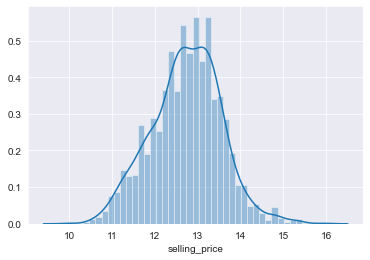

In [18]:
# Assumption - 1 => Target varibale to be normally distributed
# Log transform the target variable
import seaborn as sns
sns.set_style('darkgrid')
data_removed_outlier['selling_price'] = np.log(data_removed_outlier['selling_price'])
sns.distplot(data_removed_outlier['selling_price'])

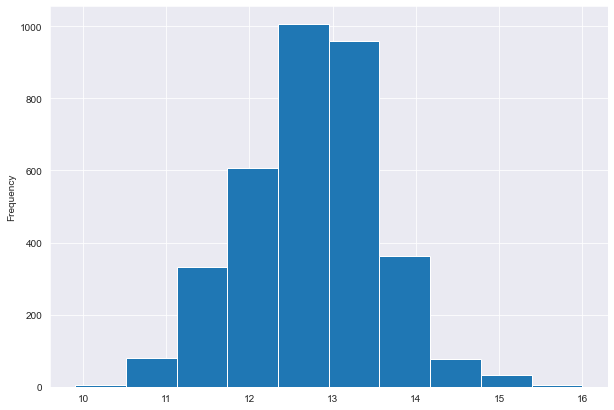

In [19]:
#Checking the hist of traget variable - selling_price
data_1 = data_removed_outlier
plt.figure(figsize=(10,7))
data_1['selling_price'].plot.hist()

### 4.6 Encoding

In [20]:
# Create One Hot Encoding
data_1 = pd.get_dummies(data_1,columns = ['fuel','seller_type','transmission','owner','brand','car_name'])
data_1.head()

,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,brand_Ambassador,brand_Audi,brand_BMW,brand_Chevrolet,brand_Daewoo,brand_Datsun,brand_Fiat,brand_Force,brand_Ford,brand_Honda,brand_Hyundai,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land,brand_MG,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Mitsubishi,brand_Nissan,brand_OpelCorsa,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo,car_name_1.4,car_name_1.6Gls,car_name_3,car_name_5,car_name_500,car_name_7,car_name_800,car_name_A-Star,car_name_A4,car_name_A5,car_name_A6,car_name_A8,car_name_Accent,car_name_Accord,car_name_Alto,car_name_Altroz,car_name_Alturas,car_name_Amaze,car_name_Ameo,car_name_Aria,car_name_Aspire,car_name_Aveo,car_name_Avventura,car_name_B,car_name_BR-V,car_name_BRV,car_name_Baleno,car_name_Beat,car_name_Bolero,car_name_Bolt,car_name_Brio,car_name_C-Class,car_name_CLASSIC,car_name_CR-V,car_name_Camry,car_name_Captiva,car_name_Captur,car_name_Celerio,car_name_Ciaz,car_name_City,car_name_Civic,car_name_Classic,car_name_Compass,car_name_Corolla,car_name_Creta,car_name_CrossPolo,car_name_Cruze,car_name_D-Max,car_name_Duster,car_name_E-Class,car_name_EON,car_name_EcoSport,car_name_Ecosport,car_name_Eeco,car_name_Elantra,car_name_Elite,car_name_Endeavour,car_name_Enjoy,car_name_Ertiga,car_name_Esteem,car_name_Estilo,car_name_Etios,car_name_Evalia,car_name_Fabia,car_name_Fiesta,car_name_Figo,car_name_Fluence,car_name_Fortuner,car_name_Freestyle,car_name_Fusion,car_name_GL-Class,car_name_GLS,car_name_GO,car_name_Getz,car_name_Grand,car_name_Grande,car_name_Gypsy,car_name_Harrier,car_name_Hector,car_name_Hexa,car_name_Ignis,car_name_Ikon,car_name_Indica,car_name_Indigo,car_name_Innova,car_name_Jazz,car_name_Jeep,car_name_Jetta,car_name_KUV,car_name_KWID,car_name_Kicks,car_name_Koleos,car_name_Laura,car_name_Linea,car_name_Lodgy,car_name_M-Class,car_name_Manza,car_name_Marazzo,car_name_Matiz,car_name_Micra,car_name_Mobilio,car_name_Nano,car_name_New,car_name_Nexon,car_name_NuvoSport,car_name_Octavia,car_name_Omni,car_name_One,car_name_Optra,car_name_Outlander,car_name_Pajero,car_name_Palio,car_name_Passat,car_name_Polo,car_name_Pulse,car_name_Punto,car_name_Q3,car_name_Q5,car_name_Q7,car_name_Quanto,car_name_RS7,car_name_Rapid,car_name_RediGO,car_name_Renault,car_name_Ritz,car_name_Rover,car_name_S-Class,car_name_S-Cross,car_name_S-Presso,car_name_SX4,car_name_Safari,car_name_Sail,car_name_Santa,car_name_Santro,car_name_Scala,car_name_Scorpio,car_name_Seltos,car_name_Sonata,car_name_Spacio,car_name_Spark,car_name_Sumo,car_name_Sunny,car_name_Superb,car_name_Supro,car_name_Swift,car_name_TUV,car_name_Tavera,car_name_Terrano,car_name_Thar,car_name_Tiago,car_name_Tigor,car_name_Triber,car_name_Tucson,car_name_V40,car_name_Vento,car_name_Venture,car_name_Venue,car_name_Verito,car_name_Verna,car_name_Vitara,car_name_WR-V,car_name_Wagon,car_name_X-Trail,car_name_X1,car_name_X5,car_name_XC,car_name_XC60,car_name_XF,car_name_XJ,car_name_XUV300,car_name_XUV500,car_name_Xcent,car_name_Xenon,car_name_Xylo,car_name_Yaris,car_name_Yeti,car_name_Zen,car_name_Zest,car_name_i10,car_name_i20,car_name_redi-GO
0,2007,11.002100,70000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,11.813030,50000,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [21]:
data_1.shape

(3470, 228)

### 4.7 Split the dataset into Train and Test

In [22]:
## Train - Test split
from sklearn.model_selection import train_test_split
X = data_1.loc[:,data_1.columns != 'selling_price']
y = data_1['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 50)
print('Train set - ', X_train.shape)
print('Test set - ', X_test.shape)

Train set -  (2776, 227)
Test set -  (694, 227)


In [23]:
print('Train set - ', y_train.shape)
print('Test set - ', y_test.shape)

Train set -  (2776,)
Test set -  (694,)


### 4.8 Build Model - Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [25]:
# print the linreg.intercept
print('Intercept : ', linreg.intercept_)
# print the linreg.coefficient
print('Co-efficient : ', linreg.coef_)

Intercept :  -187.1599021452562
Co-efficient :  [ 9.95302436e-02 -1.74986148e-06  9.08822617e-02  2.33086244e-01
 -5.83163225e-01  1.45658695e-01  1.13536025e-01  5.70205767e-03
 -7.18364097e-02  6.61343519e-02  7.15723432e-02 -7.15723430e-02
  3.11002095e-02 -8.79100884e-02  1.81138142e-04  1.17300707e-01
 -6.06719659e-02 -6.29759093e-01  1.03919568e+00  9.15317337e-01
 -5.14468236e-01 -5.05640086e-01 -8.07662357e-01 -5.02426646e-01
 -2.97472186e-01 -3.82902384e-01 -7.86786716e-02 -1.14564660e+00
 -1.71248016e-11  9.91698889e-01  2.56132004e-01  1.98956515e-02
  8.25161404e-01  2.26406715e-01 -1.54308412e-01  2.02897459e-01
  7.10748843e-01  3.38426734e-01 -2.14696327e-01 -5.20204158e-01
 -2.21386995e-01 -1.29634027e-01 -4.34217878e-01  2.63056278e-01
 -1.76920960e-01  9.27088014e-01 -8.50807264e-01  3.30603107e-01
  2.64679982e-02  1.56494866e-01  3.10510875e-01  4.50146153e-01
 -1.19867561e+00 -1.05632411e+00 -1.02276158e-01  1.71389797e-01
 -2.97089679e-01 -2.51971788e-02  3.476736

#### 4.8.1 Predict Train data

In [26]:
### Predict the train value
#y_pred_train = linreg.predict(X_train_s)
y_pred_train = linreg.predict(X_train)
pred = pd.DataFrame(np.exp(y_pred_train).astype(int))
pred.columns = ['SellingPrice']
pred.head()

,SellingPrice
0,362490
1,1128118
2,416745
3,171040
4,347009


#### 4.8.2 Predict Test data

In [27]:
### Predict the test value
y_pred_test = linreg.predict(X_test)
#y_pred_test = linreg.predict(X_test_s)
pred_test = pd.DataFrame(np.exp(y_pred_test).astype(int))
pred_test.columns = ['SellingPrice']
pred_test.head()

,SellingPrice
0,236993
1,63957
2,496388
3,695334
4,81023


#### 4.8.3 Predict Unseen (New) data

In [28]:
##Unseen data loading
unseen_data = pd.read_csv("https://raw.githubusercontent.com/babukanagaraj/DataScience/master/MachineLearning/CarPrice/data/Test-CarDetails.csv")
unseen_data['brand'] = [name.split()[0] for name in unseen_data['name']]
carname = unseen_data['name'].str.split()
unseen_data['car_name'] = [' '.join(name[1:]) for name in carname]
unseen_data.drop('name', axis =1, inplace = True)
unseen_data = pd.get_dummies(unseen_data,columns = ['fuel','seller_type','transmission','owner','brand','car_name'])
for colname in data_1.columns:
    if colname not in unseen_data.columns:
        if colname != 'selling_price':
            unseen_data[colname] = 0
### Predict the unseen data value
y_pred_unseen = linreg.predict(unseen_data)
pred_unseen = pd.DataFrame(np.exp(y_pred_unseen).astype(int))
pred_unseen.columns = ['SellingPrice']
pred_unseen

,SellingPrice
0,346286
1,435377
2,421548
3,157981
4,402022


### 4.9 Model Evaluation

#### 4.9.1 RMSE

In [29]:
### RMSE for train and test
from sklearn import metrics
RMSE_train = np.sqrt(metrics.mean_absolute_error(y_train,y_pred_train))
RMSE_test = np.sqrt(metrics.mean_absolute_error(y_test,y_pred_test))
# print RMSE for train
print('RMSE for train set is {}'.format(RMSE_train))
# print RMSE for test
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for train set is 0.4207550274550645
RMSE for test set is 0.4564783468659396


#### 4.9.2 R-Square

In [30]:
### R-Square for train and test
from sklearn.metrics import r2_score

# Calculate r2 for train 
R2_train = r2_score(y_train,y_pred_train)
# Calculate r2 for test 
R2_test = r2_score(y_test,y_pred_test)
# print r2 for train
print('R2 for train set is {}'.format(R2_train))
# print r2 for test
print('R2 for test set is {}'.format(R2_test))

R2 for train set is 0.9139702056407064
R2 for test set is 0.8985919508449034
